<a href="https://colab.research.google.com/github/sgadkar2/machine-learning-algorithms/blob/main/K-MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### Generate the unlabeled dataset from labeled and plot

<ipython-input-2-9b3611070fa3>:3: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 500).T
<ipython-input-2-9b3611070fa3>:7: RuntimeWarning: covariance is not positive-semidefinite.
  x1, y1 = np.random.multivariate_normal(mean, cov, 500).T
<ipython-input-2-9b3611070fa3>:11: RuntimeWarning: covariance is not positive-semidefinite.
  x2, y2 = np.random.multivariate_normal(mean, cov, 500).T


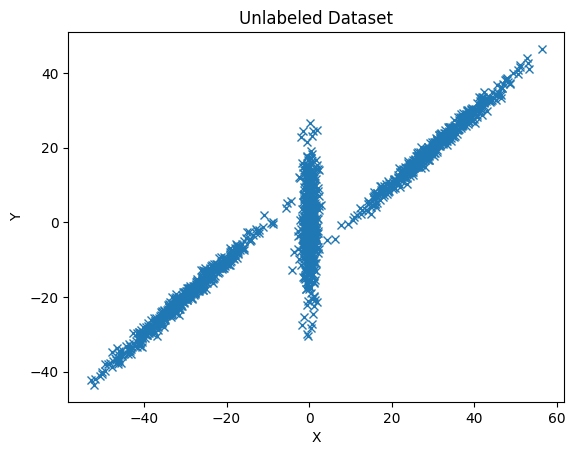

In [ ]:
mean = [0, 0]
cov = [[1, 1], [0, 100]]
x, y = np.random.multivariate_normal(mean, cov, 500).T

mean = [-30, -20]
cov = [[0, 1], [100, 100]]
x1, y1 = np.random.multivariate_normal(mean, cov, 500).T

mean = [30, 20]
cov = [[0, 1], [100, 100]]
x2, y2 = np.random.multivariate_normal(mean, cov, 500).T

UnlabelledData = np.concatenate((np.vstack((x, y)).T, np.vstack((x1, y1)).T, np.vstack((x2, y2)).T), axis=0)

X = UnlabelledData[:, 0]
Y = UnlabelledData[:, 1]

plt.plot(X, Y, 'x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unlabeled Dataset')
plt.show()

### Apply K-means clustering algorithm on the created unlabeled dataset

In [ ]:
def euclidean_distance(point, data):
    return torch.sqrt(torch.sum((point - data) ** 2, dim=1))

In [ ]:
def k_means_clustering(data, k):

    iterations=100
    centroids = data[torch.randperm(data.shape[0])[:k]]

    for i in range(iterations):

        distances = torch.stack([euclidean_distance(centroid, data) for centroid in centroids])
        centroid_idx = torch.argmin(distances, dim=0)

        new_centroids = torch.stack([data[centroid_idx == j].mean(dim=0) for j in range(k)])

        if torch.all(torch.eq(centroids, new_centroids)):
            break

        centroids = new_centroids

    return centroid_idx, centroids

In [ ]:
def calculate_sse(data, centroid_idx, centroids):

    k = centroids.shape[0]
    sse = 0.0
    for j in range(k):
        cluster_data = data[centroid_idx == j]
        if len(cluster_data) > 0:
            cluster_centroid = centroids[j]
            cluster_squared_distance = torch.sum((cluster_data - cluster_centroid) ** 2, dim=1)
            sse += torch.sum(cluster_squared_distance)
    return sse.item()

### Vary K from 2-9 and evaluate the k-means algorithm’s performance based on any Quantitative evaluation metric of k-means of your choice and plot it

In [ ]:
data = torch.tensor(UnlabelledData)
sse_values = []
for k in range(2,10):
  centroid_idx, centroids = k_means_clustering(data, k)
  squared_error = calculate_sse(data, centroid_idx, centroids)
  sse_values.append(squared_error)

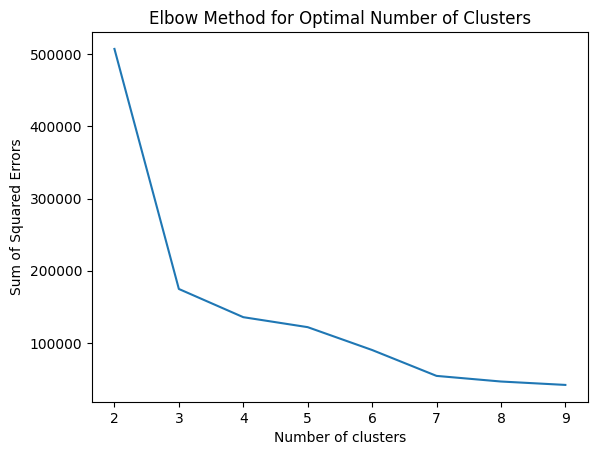

In [ ]:
k_values = range(2,10)
plt.plot(k_values, sse_values)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


### K = 3 has the best performance because after K = 3 the sum of squared errors decreases slowly

### Label the dataset again with your preferred k and plot in different color in same graph

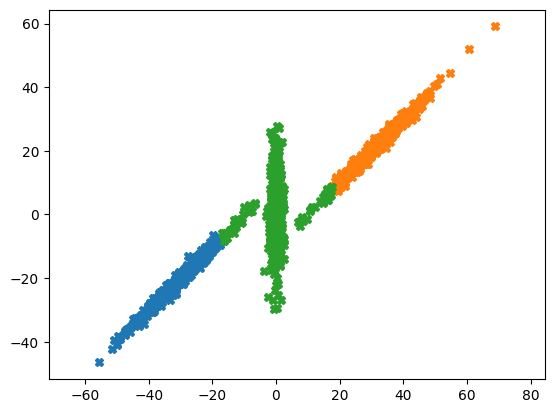

In [ ]:
data = torch.tensor(UnlabelledData)
centroid_idx, centroids = k_means_clustering(data, 3)
for j in range(3):

    plt.plot(data[centroid_idx == j,0], data[centroid_idx == j,1], 'X')
    plt.axis('equal')

plt.show()